# Wine Quality Classification Problem
In this project, we'll seek to classify wine qualities based on wine composition features. The data is derived from UCI Open Datasets and is alsop one of the common toy datasets in Scikit Learn. Our goal is to not only classify wine based on quality but also understand the effect of different scalers on the classification accuracy score.

In [40]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [38]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

## Data Analysis & Visualisation
### Data Summary Statistics

In [6]:
# In read_csv() function, we have passed the location to where the files are located in the UCI website. The data is separated by ';'
# so we used separator as ';' (sep = ";")
red_wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
red_wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
# Basic understanding of the data types and presence of null values
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Basic statistical details about data
red_wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### Exploratory Data Analysis
We'll visualise both scaled and non-scaled data to understand if there are any differences in the distributions.

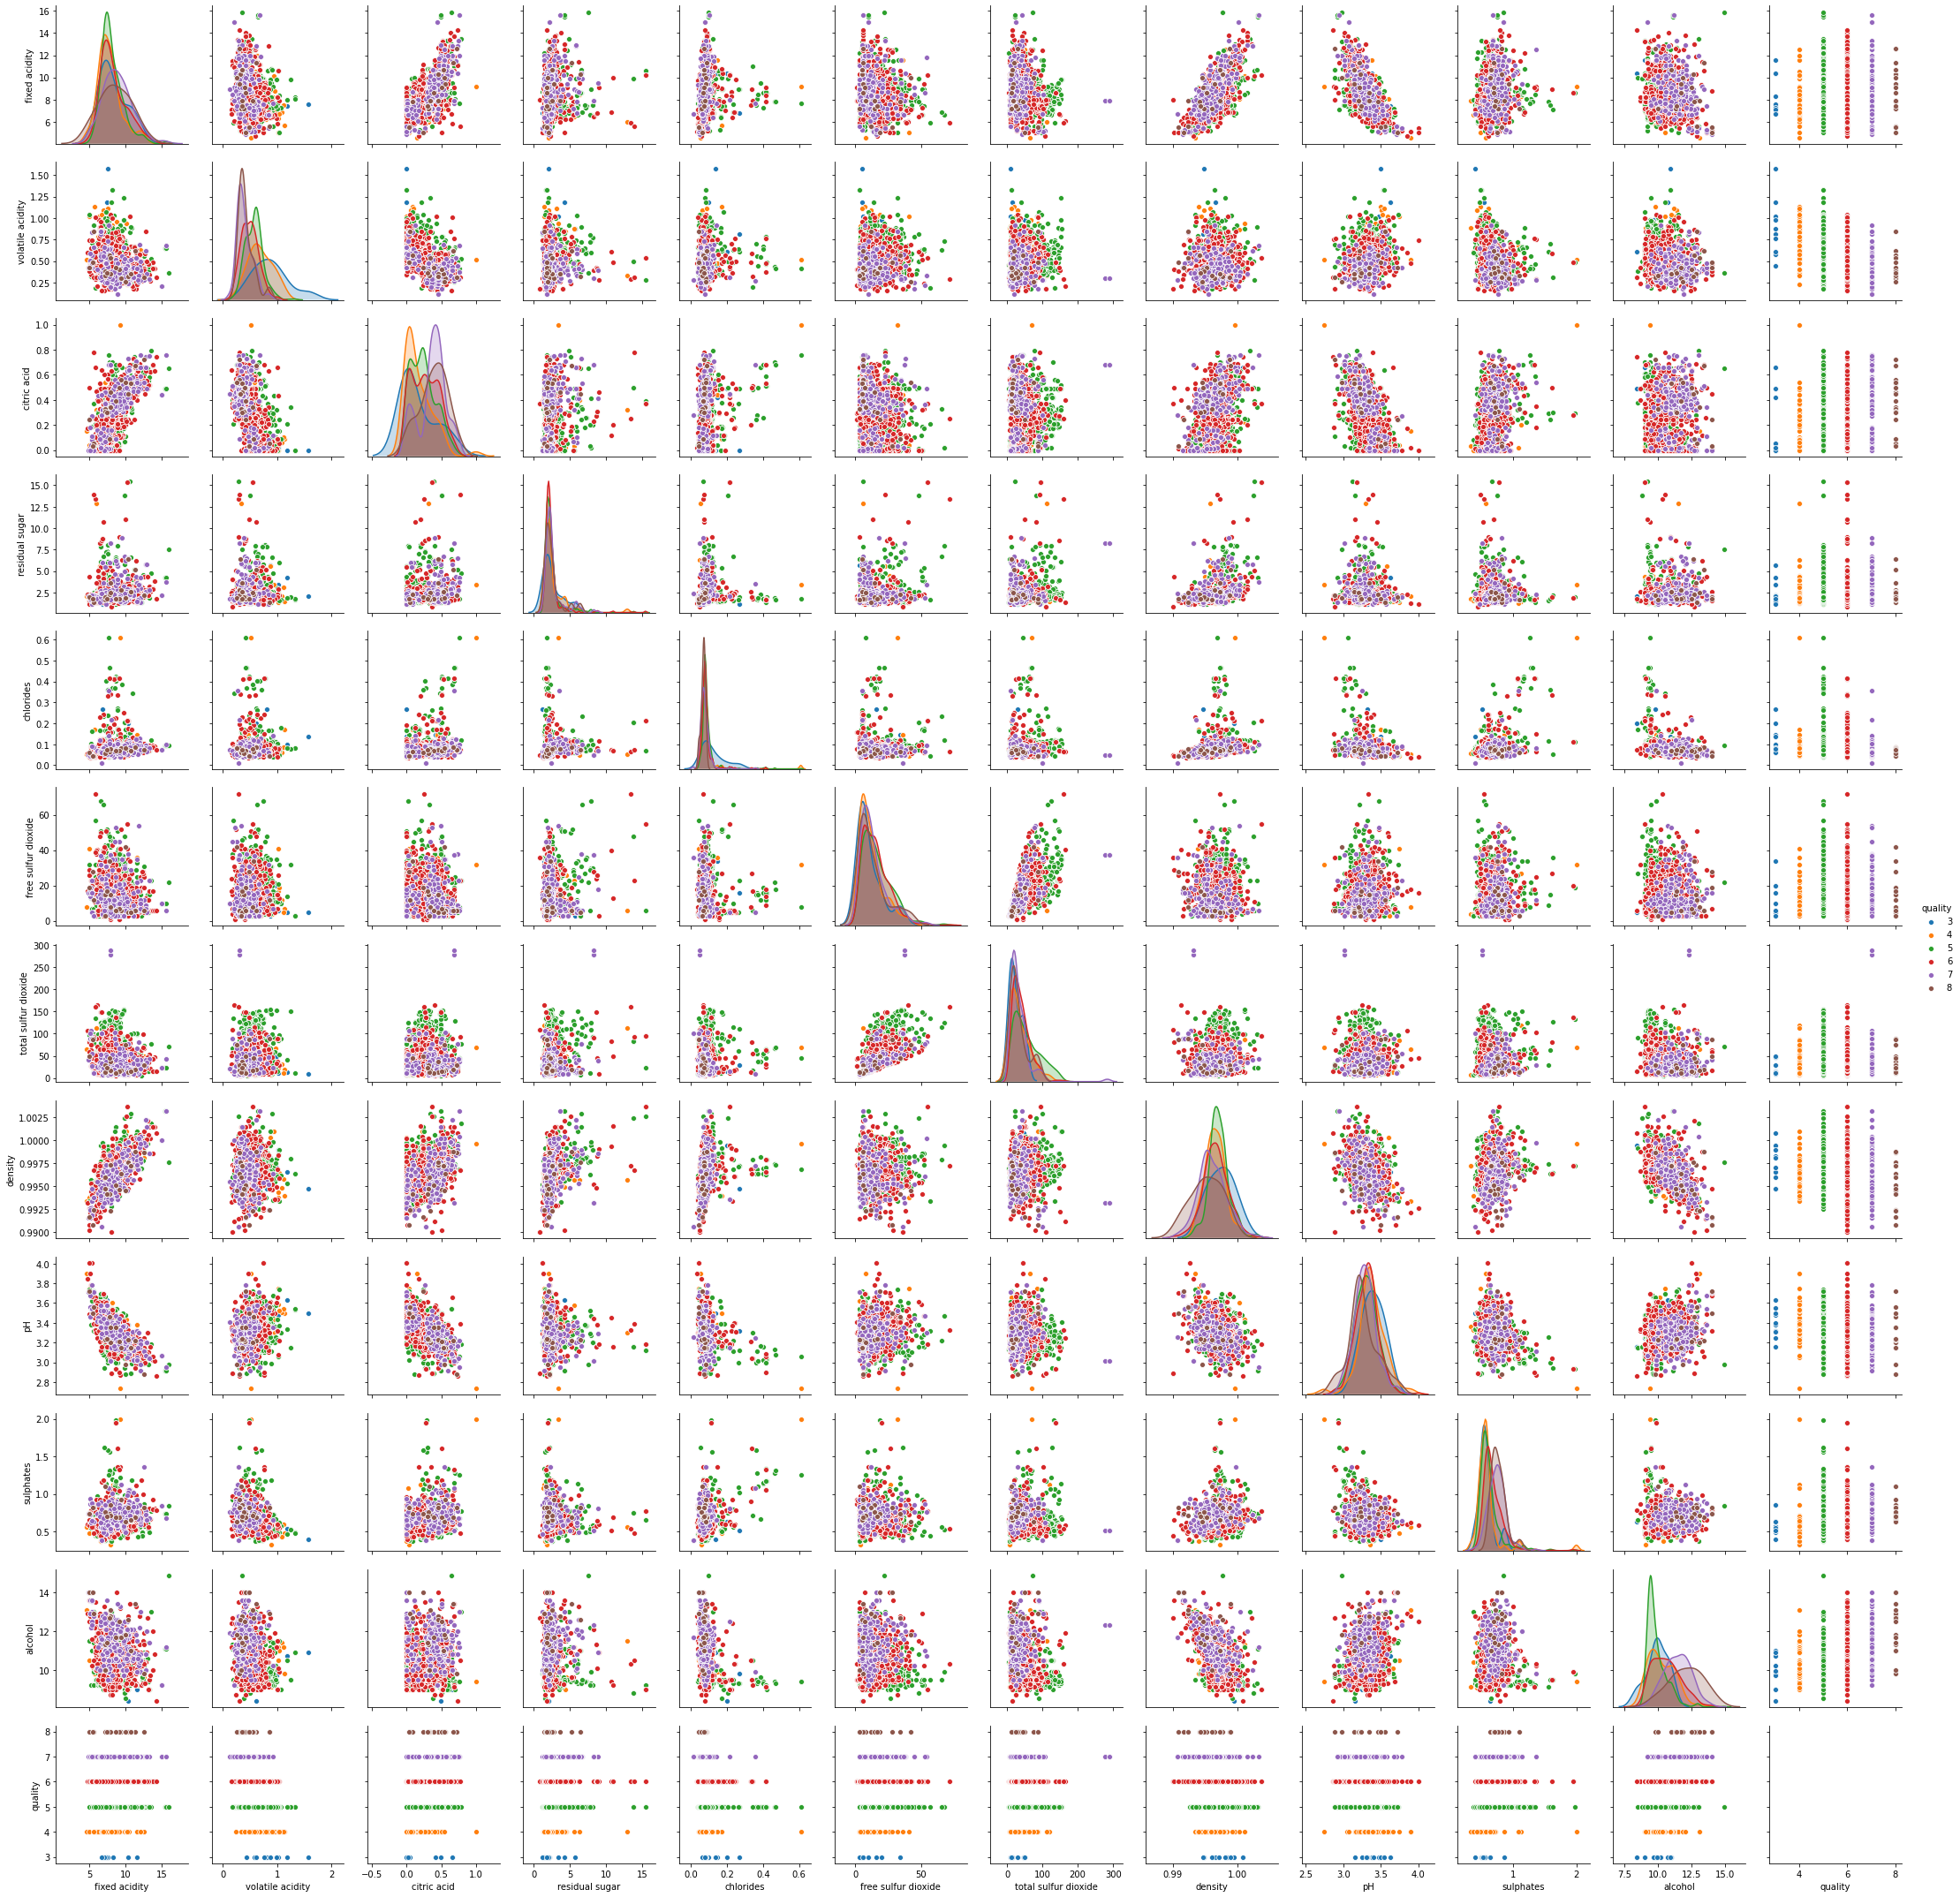

In [7]:
#Visualisation of unscaled data
sns.pairplot(red_wine_data, hue='quality')
plt.show()

In [7]:
#Split Features from the target variable before applying feature scaling
X = red_wine_data.drop(['quality'], axis=1)
y = red_wine_data.quality
print(X.shape, y.shape, red_wine_data.shape)

(1599, 11) (1599,) (1599, 12)


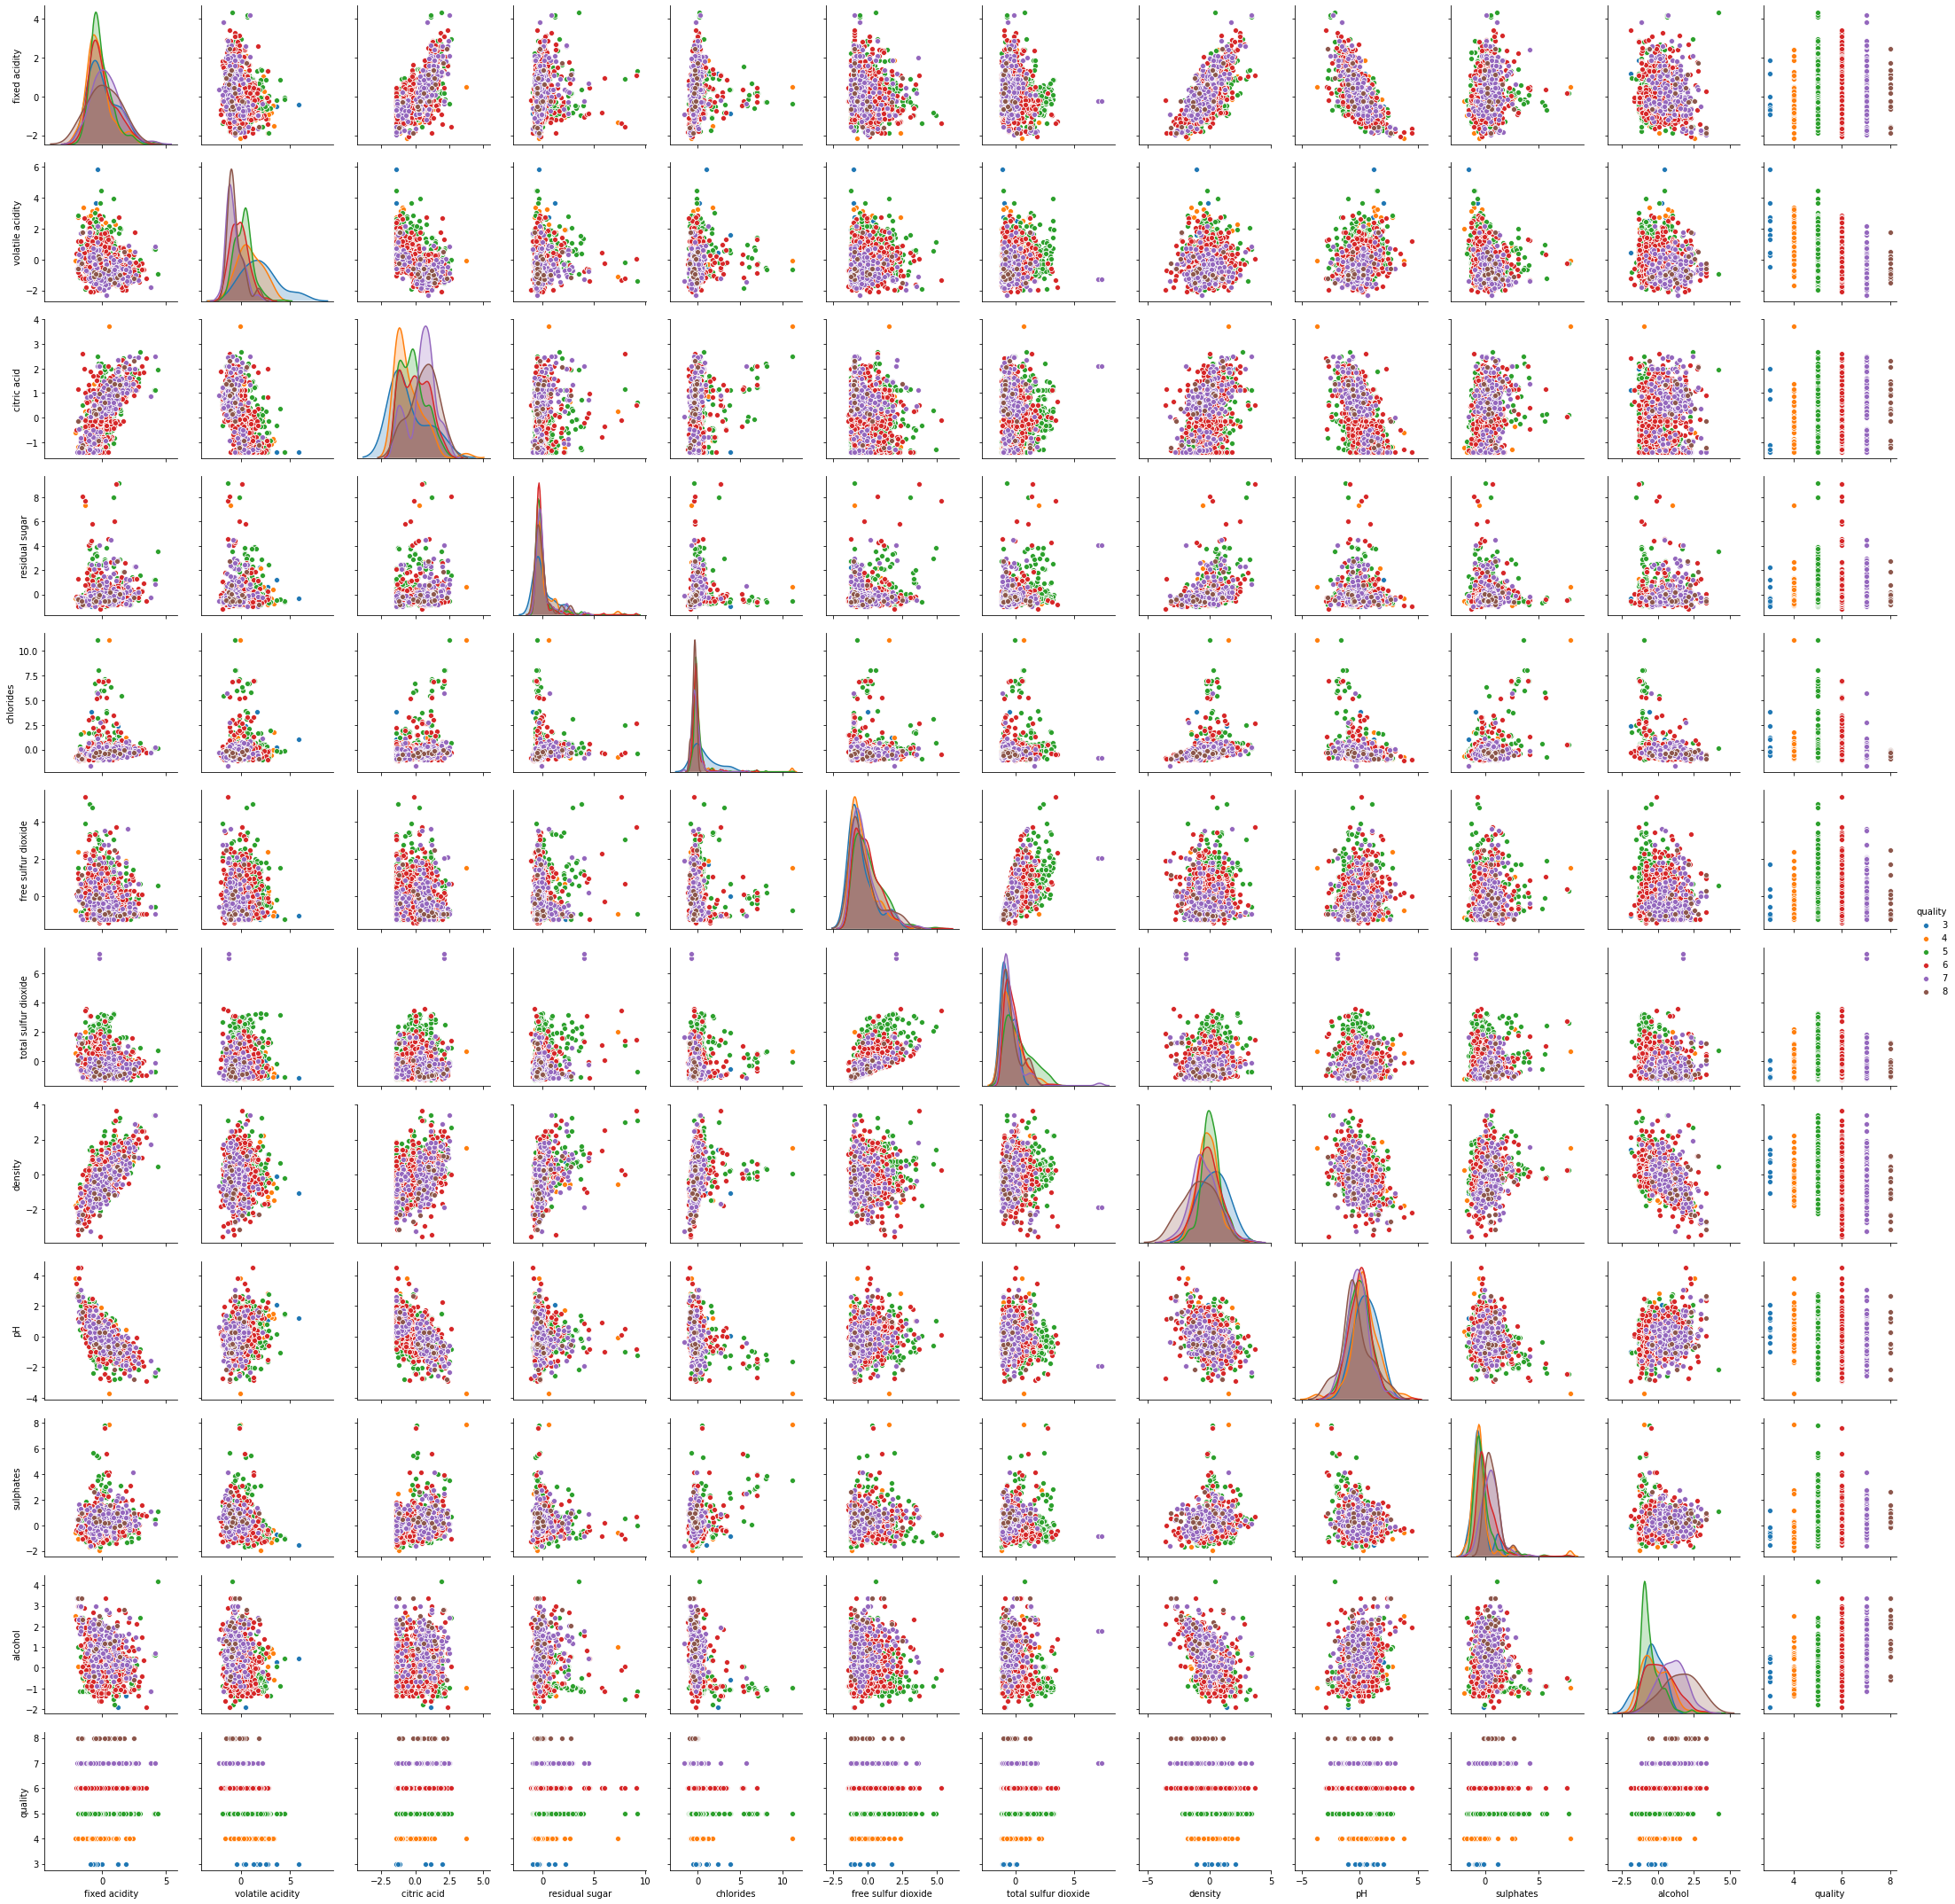

In [23]:
# Visualising Standardised Data (Standard Scaler or Z-Score Normalisation)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

cnames = list(red_wine_data.columns)
df = pd.DataFrame(X_scaled, columns = cnames[:-1])
df['quality'] = y

sns.pairplot(df, hue='quality')
plt.show()

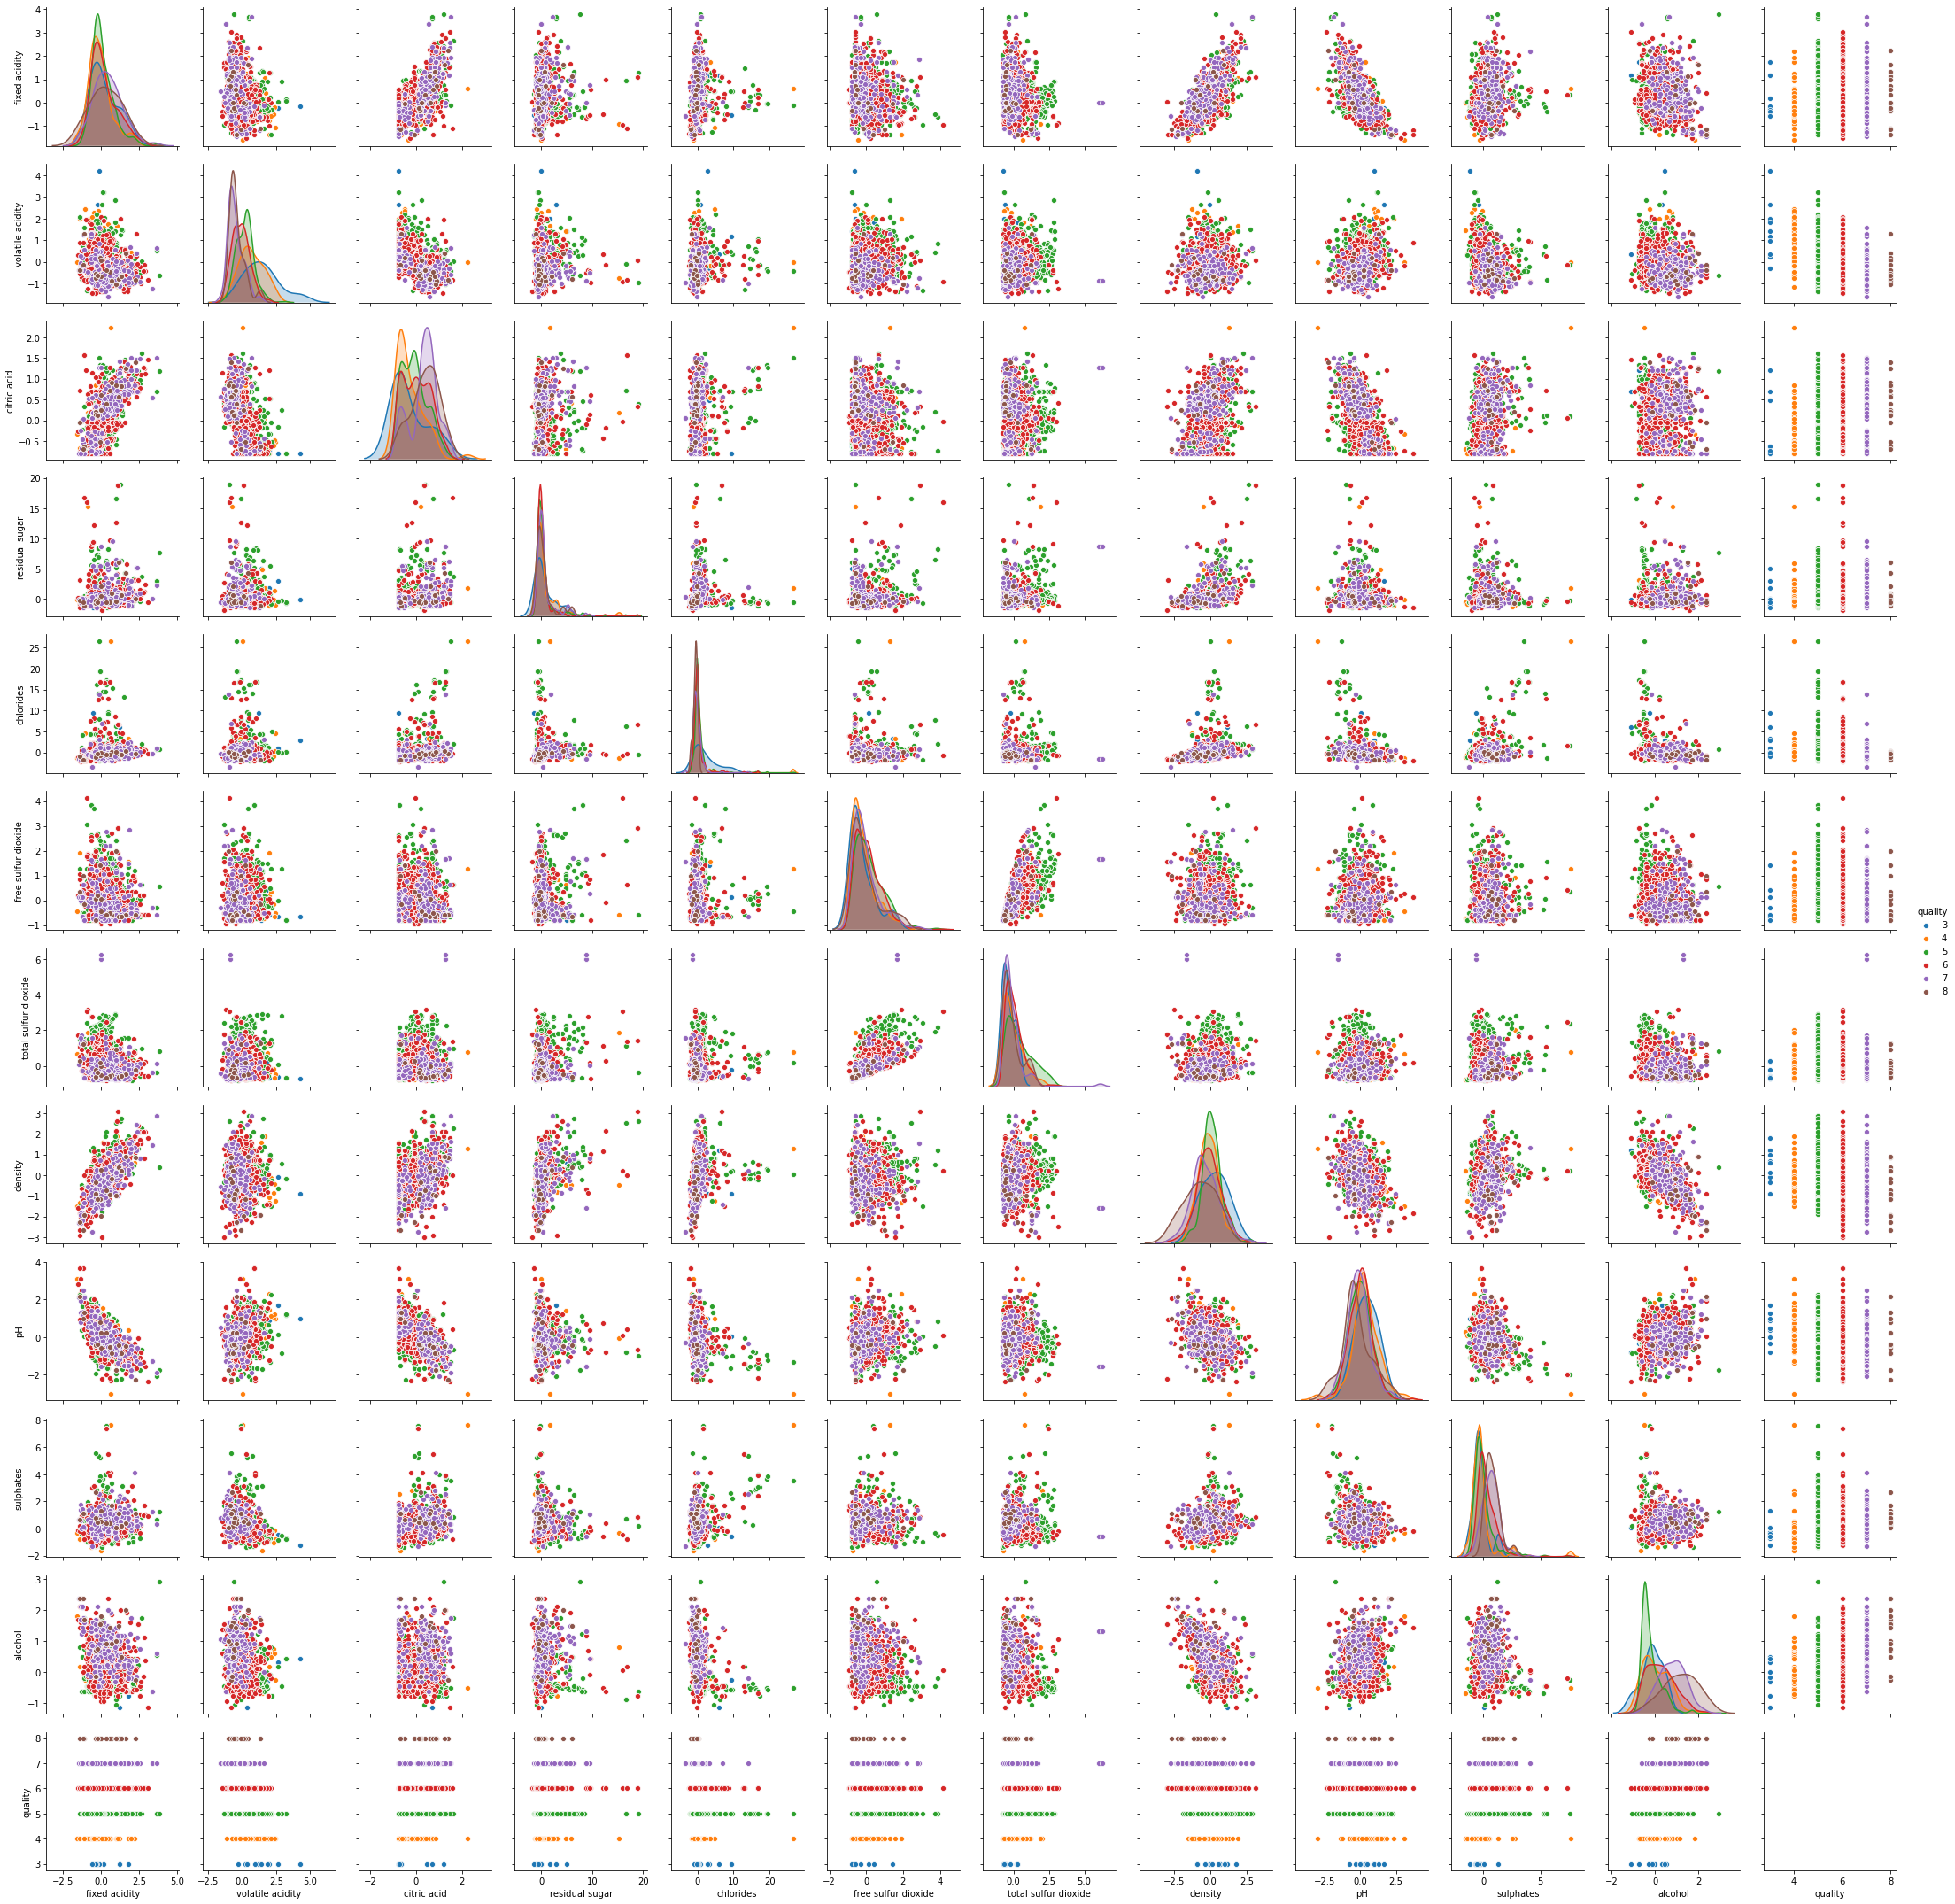

In [24]:
# Visualising Standardised Data (Robust Scaler, based on median rather than mean)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

cnames = list(red_wine_data.columns)
df = pd.DataFrame(X_scaled, columns = cnames[:-1])
df['quality'] = y

sns.pairplot(df, hue='quality')
plt.show()

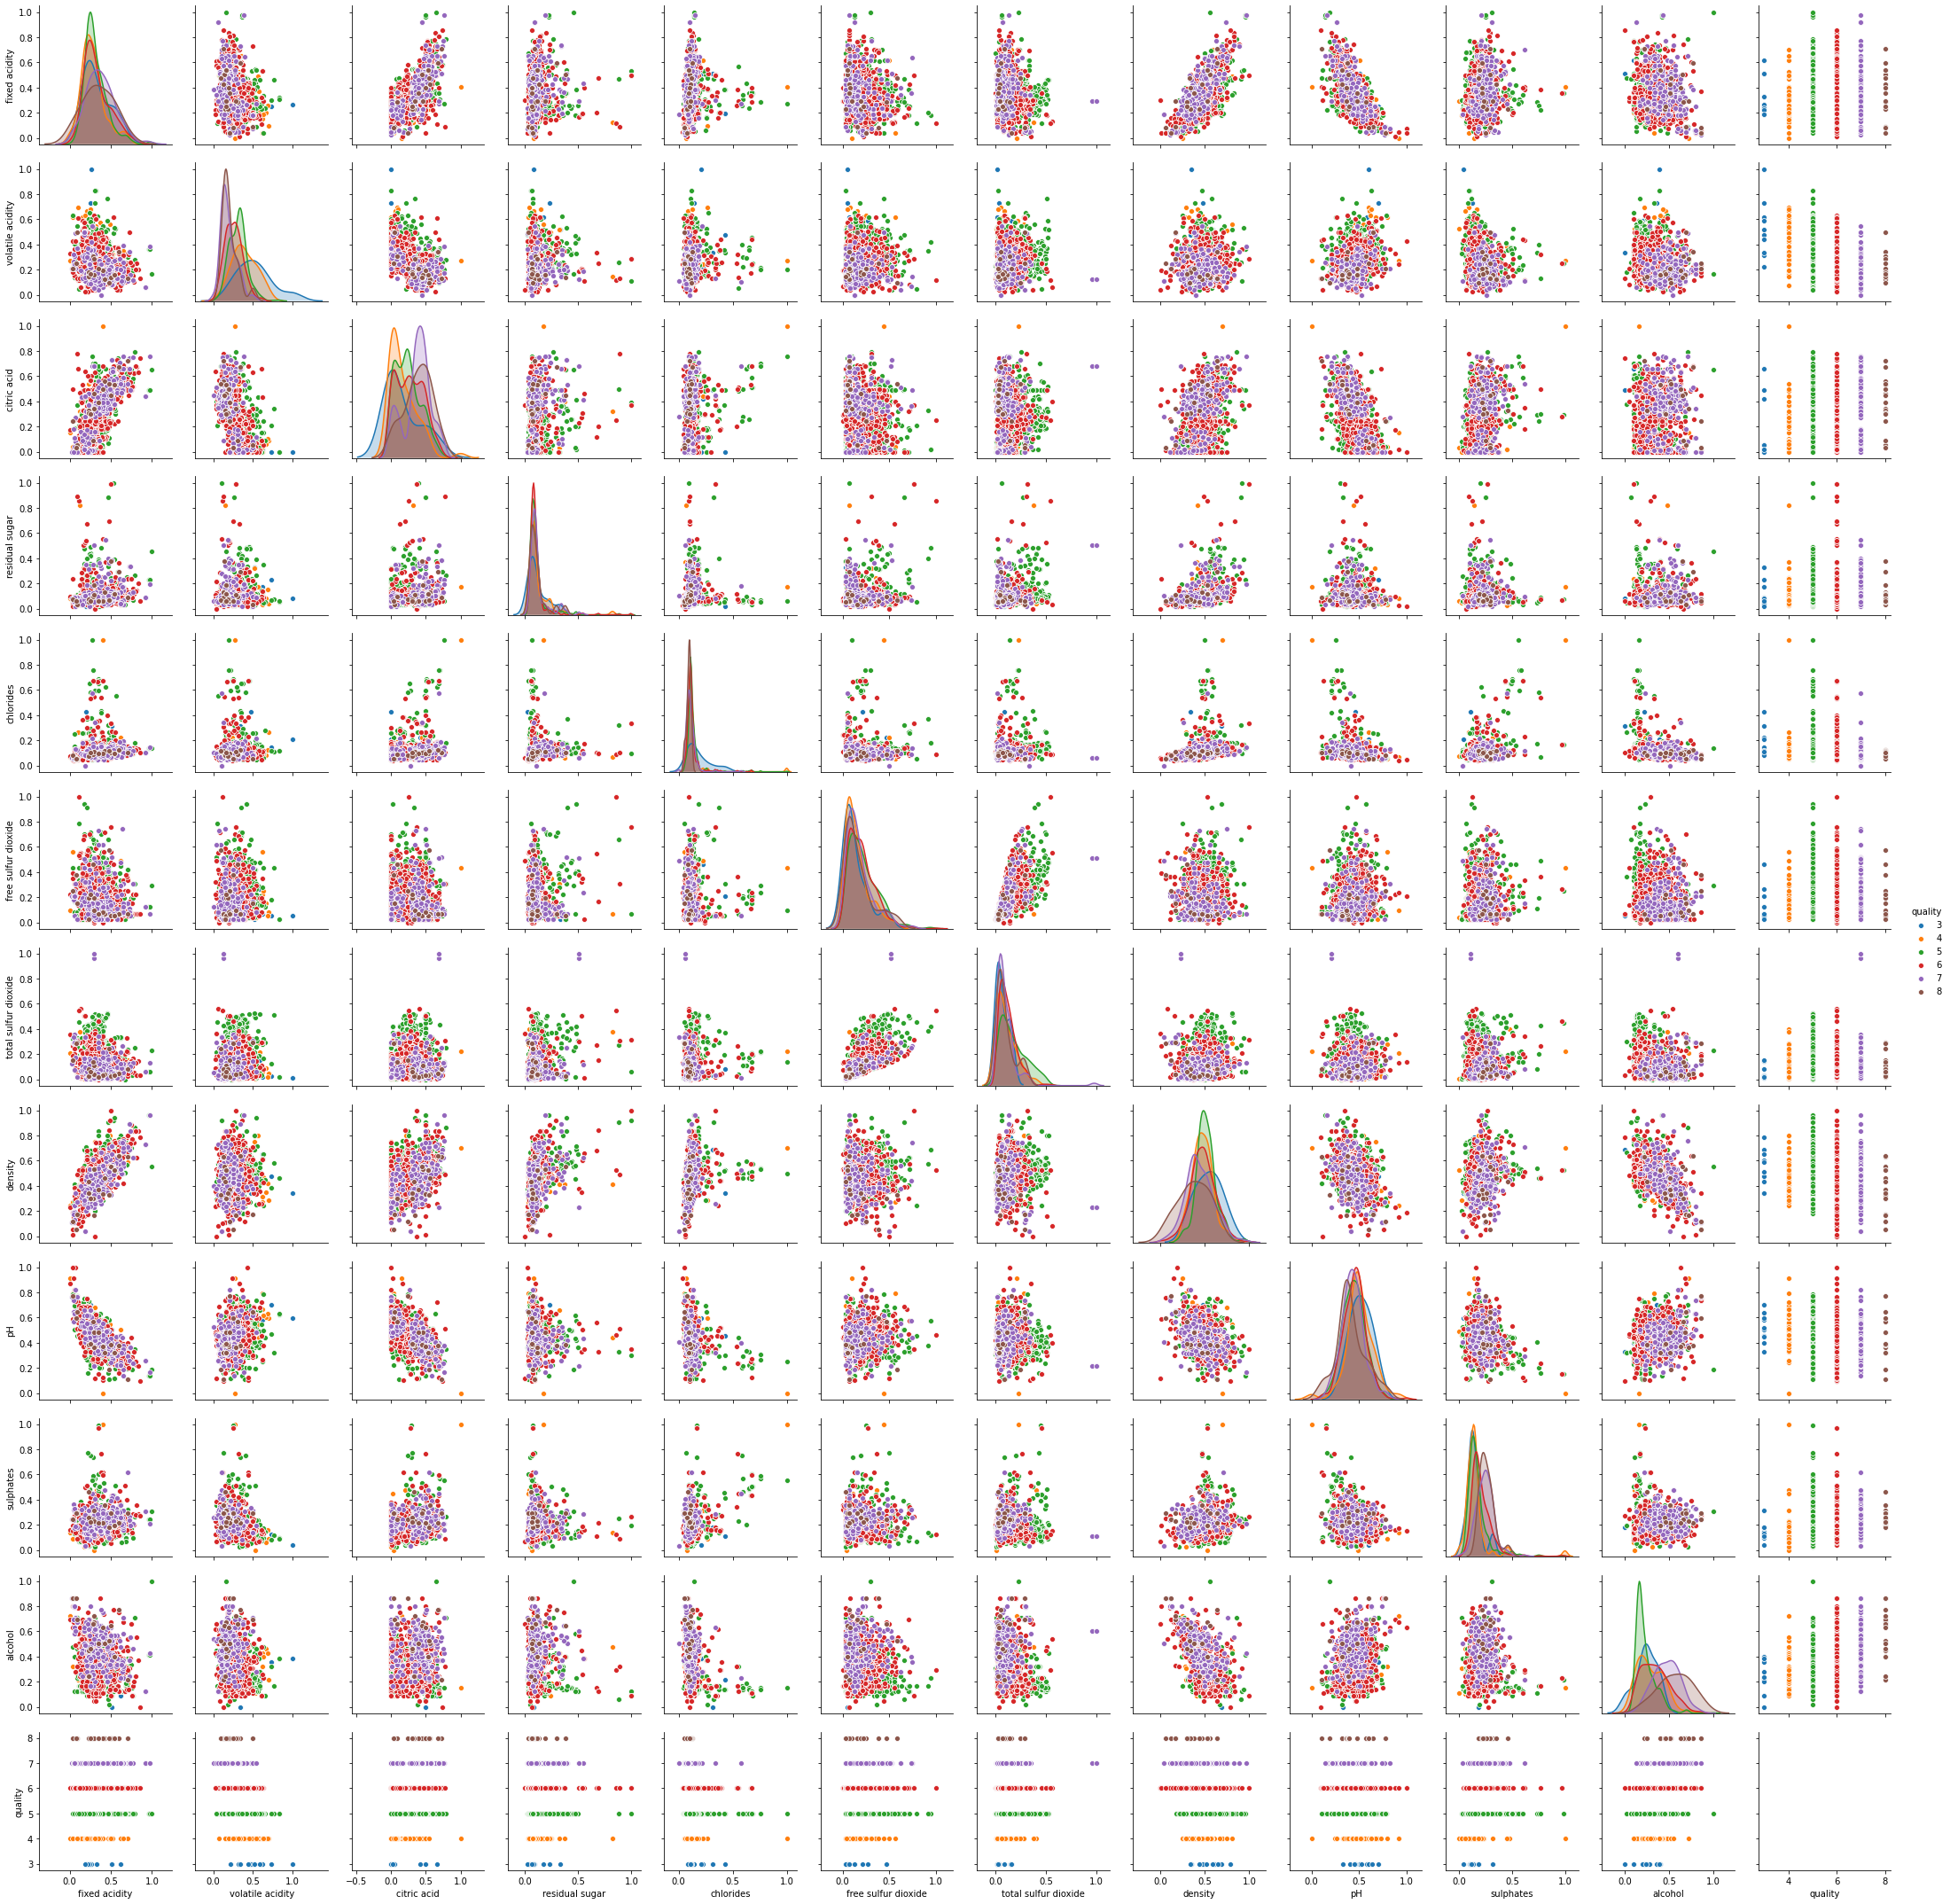

In [25]:
# Visualising Normalised Data (MinMax Scaler or MinMax Normalisation)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

cnames = list(red_wine_data.columns)
df = pd.DataFrame(X_scaled, columns = cnames[:-1])
df['quality'] = y

sns.pairplot(df, hue='quality')
plt.show()

## Machine Learning Modeling

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


### Basic Modeling
#### Logistic Regression
We expect scaling to have an effect on the convergence of gradient descent for this Logistic Regression algorithm.

In [46]:
model = LogisticRegression(penalty='l2',  C=50)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10)
print(scores, scores.mean())

[0.54961832 0.55384615 0.55384615 0.546875   0.6171875  0.515625
 0.59055118 0.65079365 0.68253968 0.656     ] 0.591688264273869


In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

model = LogisticRegression(penalty='l2',  C=100)
scores = cross_val_score(model, X_scaled, y_train, scoring='accuracy', cv=10)
print(scores, scores.mean())

[0.57251908 0.56153846 0.56153846 0.5625     0.609375   0.53125
 0.58267717 0.62698413 0.65873016 0.672     ] 0.5939112458115006


In [54]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_train)

model = LogisticRegression(penalty='l2',  C=50)
scores = cross_val_score(model, X_scaled, y_train, scoring='accuracy', cv=10)
print(scores, scores.mean())

[0.57251908 0.56153846 0.56153846 0.5625     0.609375   0.53125
 0.58267717 0.62698413 0.65873016 0.672     ] 0.5939112458115006


In [56]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)

model = LogisticRegression(penalty='l1',  C=50)
scores = cross_val_score(model, X_scaled, y_train, scoring='accuracy', cv=10)
print(scores, scores.mean())

[0.57251908 0.56923077 0.56153846 0.5625     0.609375   0.53125
 0.58267717 0.63492063 0.65873016 0.672     ] 0.5954741273743821


The performance of the logisitc regression is extremely poor and we could attribute this to there being a lack linear seprability in the data based on the visualisation seen under Exploratory Data Analysis.

We also could not see an effect on performance by feature scaling. There was however a very small different in model perform with non-scaled data having the lowest accuracy score. Time efficiency was standard all across apart from the MinMax Scaler, which could be affected by the presence of outlier in the dataset. We still maintain that scaling is essential for gradient descent algorithms and the Robust and Standard Scalers were the best for this test case.

#### Random Forest
We do not expect scaling to have an effect on Tree-based algorithms.

In [45]:
model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=None)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)
print(scores, scores.mean())

[0.69465649 0.63846154 0.68461538 0.6640625  0.71875    0.6328125
 0.68503937 0.76984127 0.73015873 0.784     ] 0.7002397781705282


In [57]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_train)

model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=None)
scores = cross_val_score(model, X_scaled, y_train, scoring='accuracy', cv=5)
print(scores, scores.mean())

[0.67175573 0.60769231 0.68461538 0.6796875  0.71875    0.6640625
 0.66929134 0.74603175 0.71428571 0.784     ] 0.694017221639867


Performance is generally better than in Logisitc Regression. No effect on performance by scaling with the accuracy score pretty similar with a minute discrepancy. We maintain that tree-based algorithms are not affected by scaling.

#### K-Nearest Neighbours
This is a distance-based algorithm and we expect scaling to have an effect on the performance of the model.

In [74]:
model = KNeighborsClassifier(n_neighbors=50, weights='distance')
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)
print(scores, scores.mean())

[0.63358779 0.6        0.66923077 0.6328125  0.6484375  0.6171875
 0.64566929 0.67460317 0.68253968 0.672     ] 0.6476068203971751


In [73]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_train)

model = KNeighborsClassifier(n_neighbors=50, weights='distance')
scores = cross_val_score(model, X_scaled, y_train, scoring='accuracy', cv=10)
print(scores, scores.mean())

[0.65648855 0.64615385 0.71538462 0.6015625  0.734375   0.6640625
 0.63779528 0.75396825 0.73015873 0.784     ] 0.6923949270874317


There is a clear difference between the performance on non-sclaed data and that of scaled data. There is a ~5% increment in accuracy score when the features are scaled.

#### Support Vector Machines
This is a gradient descent algorithm and we expect scaling to have an effect on the model. Note that we decided to use 5-fold cross-validation due to the time-taken with 10-fold cross-validation with the `linear` and `poly` kernels.

In [83]:
model = SVC(C=50, kernel='rbf')
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)
print(scores, scores.mean())

[0.55212355 0.58754864 0.59765625 0.5511811  0.5770751 ] 0.5731169282864563


In [91]:
model = SVC(C=50, kernel='linear')
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)
print(scores, scores.mean())

KeyboardInterrupt: 

In [ ]:
model = SVC(C=50, kernel='poly', degree=2)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)
print(scores, scores.mean())

Because scaling makes it easier for gradient descent to converge, you'll notice a huge difference in time taken to get the output with unscaled data versus scaled data below particularly when you use the `linear` or `poly` kernels.

In [81]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

model = SVC(C=9, kernel='rbf')
scores = cross_val_score(model, X_scaled, y_train, scoring='accuracy', cv=5)
print(scores, scores.mean())

[0.62162162 0.61867704 0.59765625 0.65748031 0.6916996 ] 0.6374269668253782


In [82]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

model = SVC(C=9, kernel='linear')
scores = cross_val_score(model, X_scaled, y_train, scoring='accuracy', cv=5)
print(scores, scores.mean())

[0.55212355 0.54474708 0.5546875  0.6023622  0.65217391] 0.5812188503207004


In [90]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

model = SVC(C=9, kernel='poly', degree=2)
scores = cross_val_score(model, X_scaled, y_train, scoring='accuracy', cv=5)
print(scores, scores.mean())

[0.52895753 0.53696498 0.49609375 0.52362205 0.57312253] 0.5317521672781279


It was impossible to fit the model in less than 20 minutes for the `poly` kernel with unscaled data. Here, we were able to fit the model for both degree 1, 2, 3, and 4 and all in less than a minute. Here are the results:
1. Degree 1: 0.5812 accuracy score (Similar to the linear kernel)
2. Degree 2: 0.5318 accuracy score
3. Degree 3: 0.6013 accuracy score (The most optimal parameter)
4. Degree 4: 0.5693 accuracy score

### Hyperparameter Tuning
From the basic modeling, where we tried out different parameters trying to get to an accuracy score closest to optimal, we realised that the following algorithms performed the best and we'll further optimise the performance using GridSearchCV:
1. KNearest Neighbours: We'll test out the n_neighbors parameter to further optimise the model.
2. Support Vector Classifier (`rbf` kernel): We'll test out C (Regularisation parameter) to further optimise the model.
3. Support Vector Classifier (`poly` kernel with `degree = 3`): We'll test out C to further optimise the model.

#### SVC Hyperparameter Tuning

In [106]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

#Iteration 3: Condense C around 3.5 (Final Iteration)
parameters = {'kernel':['rbf', 'poly'], 'C':[13,16,19,22,25,28,31]}
model = SVC(degree=3)

svc = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
svc.fit(X_scaled, y_train)
print(svc.best_score_, svc.best_params_)

#Save visualisation data for iteration 3: Gamma values, C values, and Accuracy Score Values
svc_C = svc.cv_results_['param_C'].data
svc_kernel = svc.cv_results_['param_kernel'].data
svc_scores = svc.cv_results_['split0_test_score'].data

print(svc_C, svc_kernel, svc_scores)

0.6309616888193902 {'C': 13, 'kernel': 'rbf'}
[13 13 16 16 19 19 22 22 25 25 28 28 31 31] ['rbf' 'poly' 'rbf' 'poly' 'rbf' 'poly' 'rbf' 'poly' 'rbf' 'poly' 'rbf'
 'poly' 'rbf' 'poly'] <memory at 0x7fc8e2bebbb0>


#### KNN Hyperparameter Tuning

In [109]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_train)

#Iteration 3: Condense C around 3.5 (Final Iteration)
parameters = {'n_neighbors':[100,120,140,160, 180,200]}
model = KNeighborsClassifier(weights='distance')

knn = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
knn.fit(X_scaled, y_train)
print(knn.best_score_, knn.best_params_)

#Save visualisation data for iteration 3: Gamma values, C values, and Accuracy Score Values
knn_N = knn.cv_results_['param_n_neighbors'].data
knn_scores = knn.cv_results_['split0_test_score'].data

print(knn_N, knn_scores)

0.6708365910867865 {'n_neighbors': 120}
[100 120 140 160 180 200] <memory at 0x7fc8e2a20e20>


Text(0, 0.5, 'Accuracy Score')

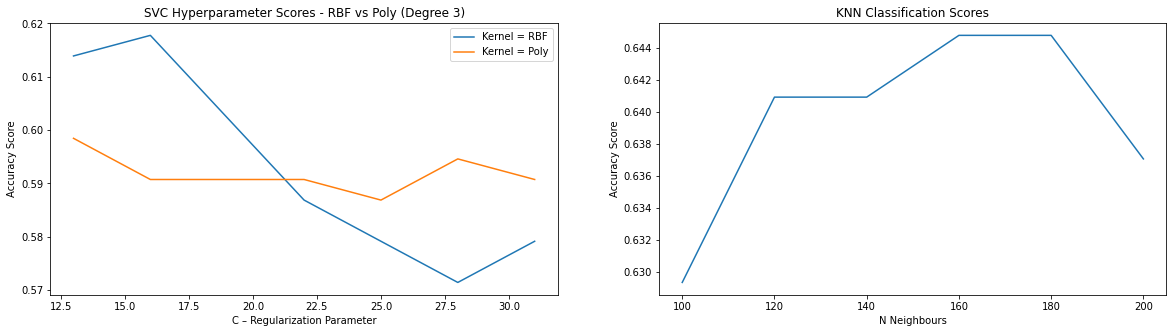

In [110]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(svc_C[::2], svc_scores[::2], label="Kernel = RBF")
plt.plot(svc_C[1::2], svc_scores[1::2], label="Kernel = Poly")
plt.title("SVC Hyperparameter Scores - RBF vs Poly (Degree 3)")
plt.xlabel("C – Regularization Parameter")
plt.ylabel("Accuracy Score")
plt.legend()

plt.subplot(1,2,2)
plt.plot(knn_N, knn_scores)
plt.title("KNN Classification Scores")
plt.xlabel("N Neighbours")
plt.ylabel("Accuracy Score")